In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
from utility import get_sample_df,train_prediction_based_models
from models import predictionCnn
from utility import score_postprocessing
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [11]:
df = get_sample_df()

In [12]:
original_df = df

In [13]:
nb_features = 1
window_size = 10
end_point = 3000
input_shape = (window_size,nb_features)
model = predictionCnn(input_shape)
probation_period = 750 if(len(df)>=5000) else int(0.15*len(df))
df = original_df.iloc[0:end_point]
nb_epoch = 1
error_prediction = []
convergence_history = []
prediction = []
L = []
for i in np.arange(input_shape[0],end_point):
    X_input = df["value"].values[i-(input_shape[0]):i].reshape((1,)+input_shape)
    Y_input = df["value"].values[i].reshape((1,1))
    prediction.append(model.predict(X_input)[0][0])
    error_prediction.append((model.predict(X_input) -Y_input)[0][0])
    history = model.fit(X_input,Y_input , nb_epoch=nb_epoch, verbose=0)
    convergence_history = convergence_history+ list(history.history['loss'])
    L.append(score_postprocessing(error_prediction,len(error_prediction)))
#        print(i)
temp_no_error = [0]*(input_shape[0])
error_prediction = temp_no_error + error_prediction
L_no_error = [0.5]*(input_shape[0])
L = L_no_error + L
L[input_shape[0]] = 0.5
#error_prediction[0:probation_period] = [0]*probation_period
df['error_prediction'] = error_prediction
df['anomaly_score'] = L

/executor/code/models.py:39: UserWarning:

Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=3, input_shape=(10, 1), activation="relu", filters=5)`

/executor/code/models.py:40: UserWarning:

Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=2, input_shape=(10, 1), activation="relu", filters=5)`



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 8, 5)              20        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 5)              55        
_________________________________________________________________
flatten_2 (Flatten)          (None, 35)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 816
Trainable params: 816
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.

/executor/code/utility.py:167: RuntimeWarning:

invalid value encountered in double_scalars



NameError: name 'input_shapep' is not defined

In [14]:
L[input_shape[0]] = 0.5
#error_prediction[0:probation_period] = [0]*probation_period
df['error_prediction'] = error_prediction
df['anomaly_score'] = L
L[input_shape[0]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0.5

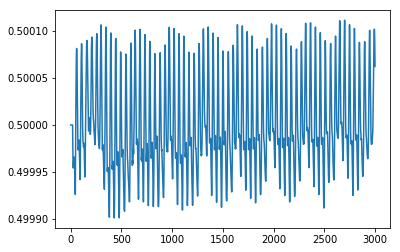

In [18]:
plt.plot(df.anomaly_score.values)

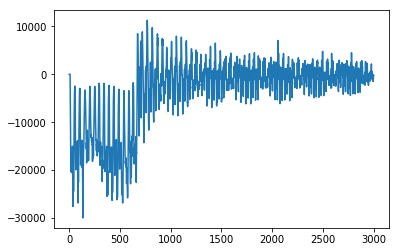

In [16]:
n = 10
N = 3000
#plt.plot(df.value.values[0+n:N])
#plt.plot(prediction[0:N-n])
plt.plot(df.anomaly_score)
#plt.plot(error_prediction[2000:N-n])

In [17]:
L = []
for ind in range(len(df)) :
    L.append(score_postprocessing(df.anomaly_score.values,ind))

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning:

Mean of empty slice.

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

/executor/code/utility.py:163: RuntimeWarning:

invalid value encountered in double_scalars



nan nan
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-228.636363636 -251.5
-573.25 -687.9
-1031.15384615 -1340.5
-1746.0 -2444.4
-2553.4 -3830.1
-3385.375 -5416.6
-4240.35294118 -7208.6
-5135.11111111 -9243.2
-5893.21052632 -11197.1
-6603.9 -13207.8
-7193.42857143 -14854.7
-7671.90909091 -16190.3
-8088.30434783 -17262.6
-8520.58333333 -18005.0
-8936.08 -18510.1
-9318.76923077 -18812.2
-9646.88888889 -18838.0
-9997.32142857 -18749.3
-10326.5862069 -18750.0
-10668.7333333 -18798.4
-10949.7419355 -18838.0
-11187.0625 -18920.4
-11339.8181818 -18818.3
-11447.8529412 -18473.3
-11612.2857143 -18302.8
-11832.0833333 -18366.7
-12133.0 -18845.5
-12539.9736842 -19659.4
-12906.3076923 -20387.5
-13206.25 -20818.8
-13442.0731707 -21168.3
-13607.5952381 -21353.3
-13835.3488372 -22070.6
-14076.3409091 -23013.2
-14281.7111111 -23624.7
-14443.6956522 -23845.5
-14564.1276596 -23559.3
-14596.3541667 -22410.6
-14571.3265306 -21064.9
-14478.8 -19569.0
-14343.3529412 -18038

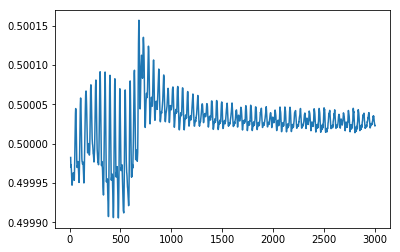

In [18]:
plt.plot(L)

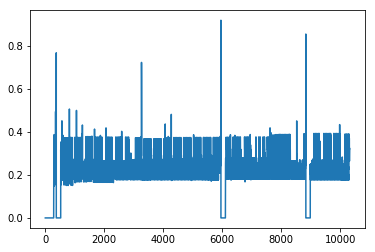

In [27]:
contextOSE_df = pd.read_csv("results/contextOSE/realKnownCause/contextOSE_nyc_taxi.csv")
plt.plot(contextOSE_df.anomaly_score)

In [1]:
import pickle